# *Monod* demonstration: fit to neural cell subtypes

We have run the *Monod* inference pipeline on four pre-clustered mouse brain cell datasets, disaggregated into GABAergic and glutamatergic cell types, as well as some glutamatergic subtypes. We would like to check whether the sampling parameters obtained for each dataset are consistent.

## Metadata and prerequisites

Define the dataset metadata and disk locations.

In [1]:
import time
t1 = time.time()

In [2]:
import sys
sys.path.insert(0, '/home/ggorin/projects/monod/src/monod/')

In [3]:
from preprocess import *
from extract_data import extract_data
import cme_toolbox
from cme_toolbox import CMEModel
import inference
from inference import InferenceParameters, GradientInference
import analysis 
from analysis import *

Let us investigate the consistency of the sampling parameters.

In [4]:
dataset_meta = ['B08','C01','F08','H12']
subcluster_names = ['l23it','l5it','l6it','l5et', 'l56np', 'l6ct', 'l6b']
cluster_names = ['gaba','glu']
dataset_names = ['allen_'+x+'_'+y for x in dataset_meta for y in cluster_names]   \
              + ['allen_'+dataset_meta[0]+'_'+y  for y in subcluster_names] 
n_datasets = len(dataset_names)

In [5]:
dir_string = './fits/gg_220602_022_allen_celltypes_1'
result_strings = [dir_string+'/'+x+'/Bursty_Poisson_20x21/grid_scan_results_upd.res' for x in dataset_names]

opt = []
n_cells = []
for i in range(n_datasets):
    sr = load_search_results(result_strings[i])
    opt.append(sr.samp_optimum)
    n_cells.append(sr.n_cells)
opt = np.asarray(opt)
n_cells = np.asarray(n_cells)

INFO:root:Grid scan results loaded from ./fits/gg_220602_022_allen_celltypes_1/allen_B08_gaba/Bursty_Poisson_20x21/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220602_022_allen_celltypes_1/allen_B08_glu/Bursty_Poisson_20x21/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220602_022_allen_celltypes_1/allen_C01_gaba/Bursty_Poisson_20x21/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220602_022_allen_celltypes_1/allen_C01_glu/Bursty_Poisson_20x21/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220602_022_allen_celltypes_1/allen_F08_gaba/Bursty_Poisson_20x21/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220602_022_allen_celltypes_1/allen_F08_glu/Bursty_Poisson_20x21/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220602_022_allen_celltypes_1/allen_H12_gaba/Bursty_Poisson_20x21/grid_scan_results_upd.res.
INFO:root

In [6]:
opt

array([[-6.23684211, -0.8       ],
       [-6.13157895, -0.8       ],
       [-6.13157895, -0.8       ],
       [-6.02631579, -0.8       ],
       [-6.23684211, -0.8       ],
       [-6.23684211, -0.8       ],
       [-6.23684211, -0.8       ],
       [-6.23684211, -0.8       ],
       [-6.34210526, -1.1       ],
       [-6.13157895, -0.8       ],
       [-6.34210526, -1.2       ],
       [-5.92105263, -0.7       ],
       [-6.55263158, -1.4       ],
       [-6.23684211, -1.        ],
       [-6.34210526, -0.7       ]])

In [7]:
xl = [sr.sp.samp_lb[0],sr.sp.samp_ub[0]]
yl = [sr.sp.samp_lb[1],sr.sp.samp_ub[1]]
x=np.linspace(xl[0],xl[1],sr.sp.gridsize[0])
y=np.linspace(yl[0],yl[1],sr.sp.gridsize[1])

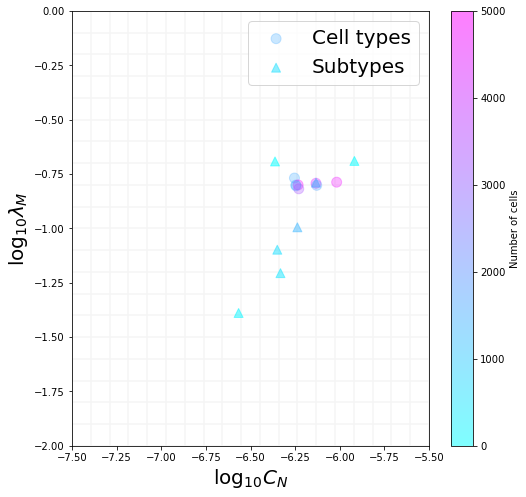

In [8]:
fs = 20


fig1,ax1 = plt.subplots(1,1,figsize=(8,8))
for i in range(sr.sp.gridsize[0]):
    plt.plot([x[i]]*2,yl,c='whitesmoke')
for i in range(sr.sp.gridsize[1]):
    plt.plot(xl,[y[i]]*2,c='whitesmoke')
jit = np.random.randn(n_datasets,2)*0.01
opt_ = opt+jit
cmap = 'cool'
# for i in range(7):
ctf = range(8)
plt.scatter(opt_[ctf,0],opt_[ctf,1],100,n_cells[ctf],zorder=1000,
            alpha=0.3,cmap=cmap,label='Cell types',vmin=0,vmax=5000)
stf = range(8,n_datasets)
plt.scatter(opt_[stf,0],opt_[stf,1],80,n_cells[stf],marker='^',zorder=1000,
            alpha=0.5,cmap=cmap,label='Subtypes',vmin=0,vmax=5000)
plt.xlim(xl)
plt.ylim(yl)

plt.legend(fontsize=fs)
plt.colorbar(label='Number of cells')

plt.xlabel(r'$\log_{10} C_N$',fontsize=fs)
plt.ylabel(r'$\log_{10} \lambda_M$',fontsize=fs)

fig_string = sr.batch_analysis_string+'/landscape_qc.png'
plt.savefig(fig_string,dpi=450)

As might be expected, the subtypes with very low cell numbers appear to show stronger deviations.

In [9]:
t2 = time.time()
print('Runtime: {:.2f} seconds.'.format(t2-t1))

Runtime: 4.34 seconds.
